In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib


In [52]:
# Load data
df = pd.read_csv('grade_dataset.csv')

In [53]:
df.head()

,stu_id,gender,age,course_id,total_study_time,avg_study_time,activity_count,active_days,grade
0,1,Female,23,1,0.0,0.0,0,0,59
1,1,Female,23,2,10.0,10.0,1,1,80
2,1,Female,23,3,0.0,0.0,0,0,79
3,1,Female,23,4,0.0,0.0,0,0,76
4,1,Female,23,5,0.0,0.0,0,0,51


In [54]:
features = ['total_study_time', 'avg_study_time', 'activity_count', 'active_days']
X = df[features]
# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


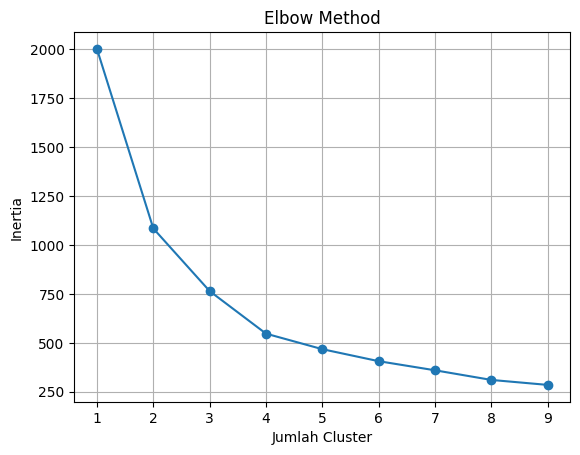

In [55]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot elbow
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


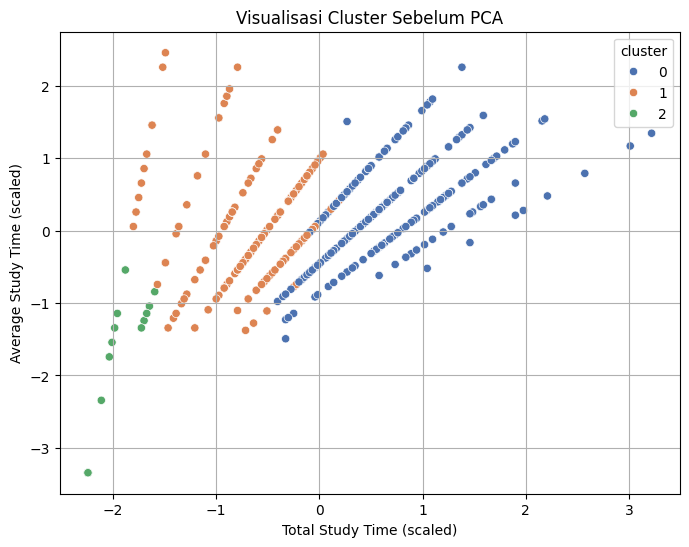

In [56]:


# Latih KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Membuat DataFrame dari data yang telah dinormalisasi

df_scaled = pd.DataFrame(X_scaled, columns=features)
df_scaled['cluster'] = clusters

# Visualisasi sebelum PCA
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_scaled, x='total_study_time', y='avg_study_time', hue='cluster', palette='deep')
plt.title('Visualisasi Cluster Sebelum PCA')
plt.xlabel('Total Study Time (scaled)')
plt.ylabel('Average Study Time (scaled)')
plt.grid(True)
plt.show()


In [57]:

# Reduksi dimensi dengan PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


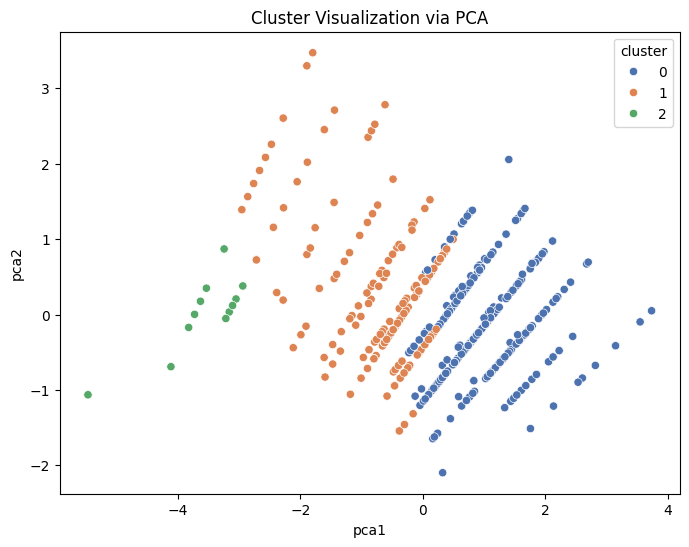

In [58]:
import seaborn as sns
import pandas as pd

df_viz = pd.DataFrame(X_pca, columns=['pca1', 'pca2'])
df_viz['cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_viz, x='pca1', y='pca2', hue='cluster', palette='deep')
plt.title('Cluster Visualization via PCA')
plt.show()


In [59]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')
print(f'Total variance explained by 2 components: {explained_variance.sum():.2f}')


Explained variance ratio: [0.70882345 0.17104298]
Total variance explained by 2 components: 0.88


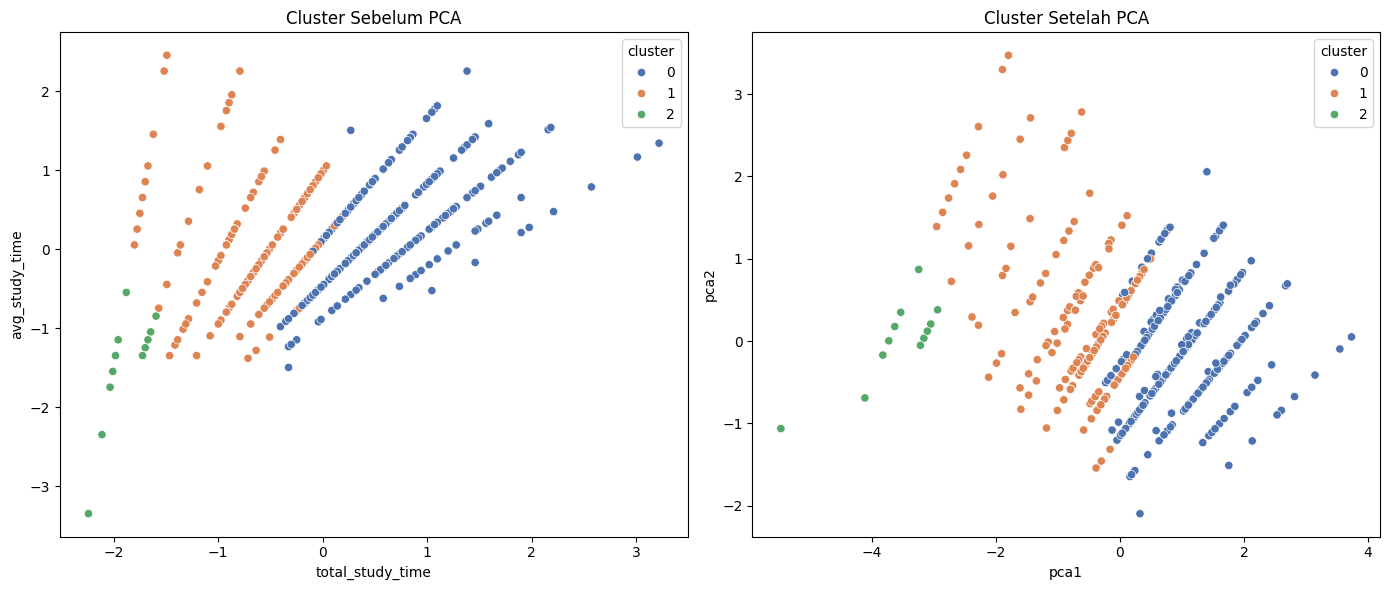

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Sebelum PCA
sns.scatterplot(data=df_scaled, x='total_study_time', y='avg_study_time', hue='cluster', ax=axes[0], palette='deep')
axes[0].set_title('Cluster Sebelum PCA')

# Setelah PCA
sns.scatterplot(data=df_viz, x='pca1', y='pca2', hue='cluster', ax=axes[1], palette='deep')
axes[1].set_title('Cluster Setelah PCA')

plt.tight_layout()
plt.show()
